# <font color='green'>[FB-z21mp] Volodymyr Duduladenko </font> 

## Data classification

In [1]:
import pandas as pd

# load data
# https://www.kaggle.com/datasets/deepu1109/star-dataset
df = pd.read_csv("6 class csv.csv")

classes = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hyperginat']

# show top
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [2]:
# show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [3]:
# show size
df.shape

(240, 7)

In [4]:
# show missed data
df.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [5]:
# delete missing data
df = df.dropna()

<AxesSubplot:>

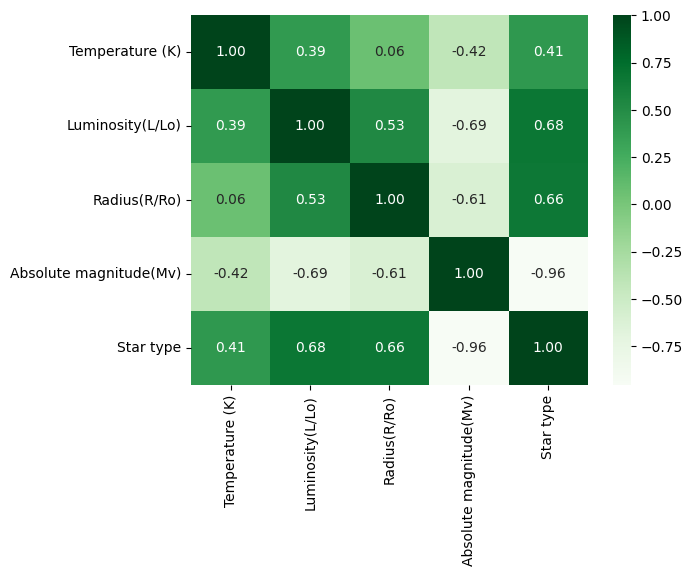

In [6]:
# draw heatmap plot
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), cmap='Greens', annot=True, fmt=".2f")

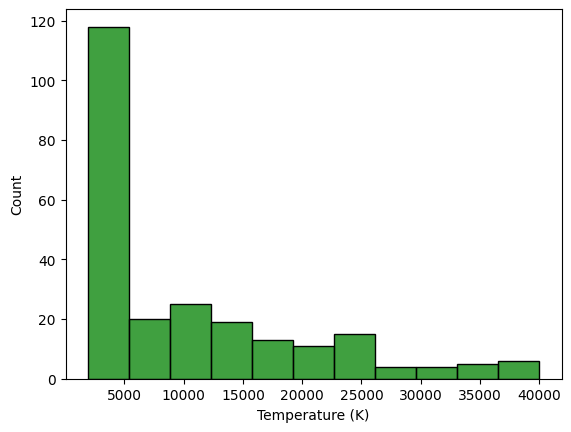

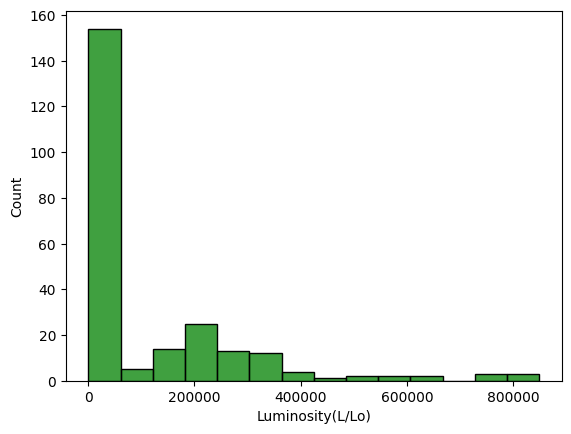

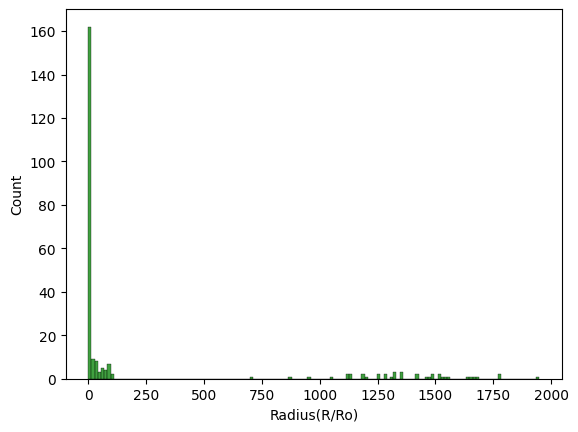

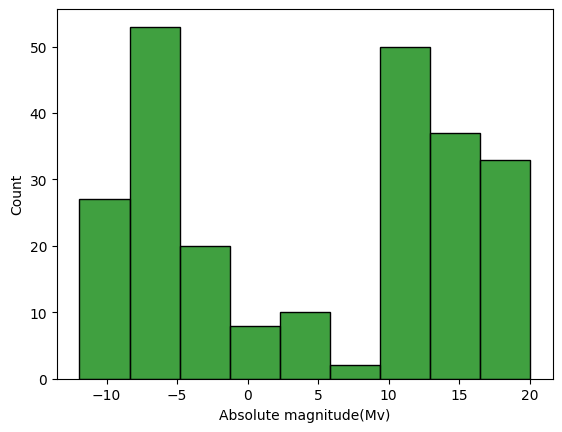

In [7]:
import matplotlib.pyplot as plt

plot_color ='Green'

# show features histograms
for fea in df.columns[:4]:
    figure = plt.figure()
    sns.histplot(df[fea], color=plot_color)

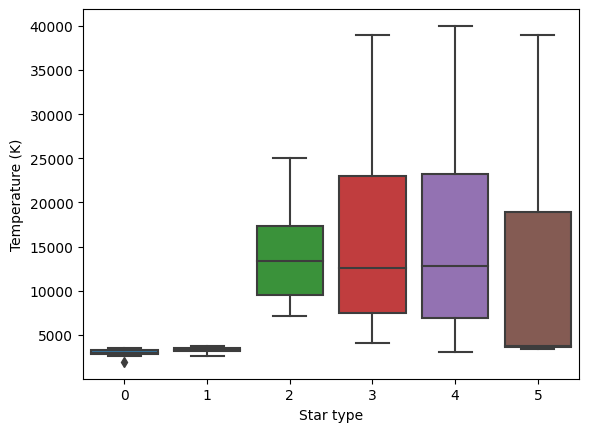

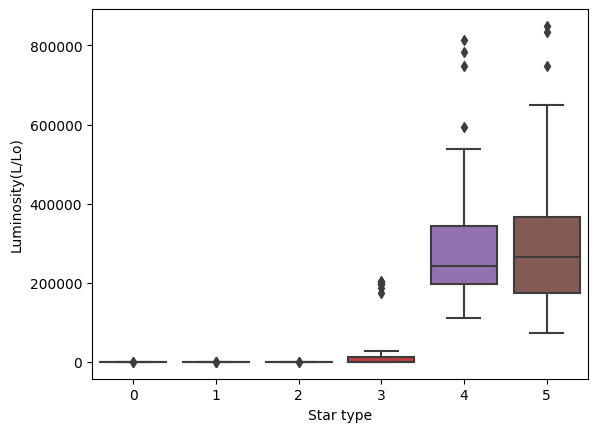

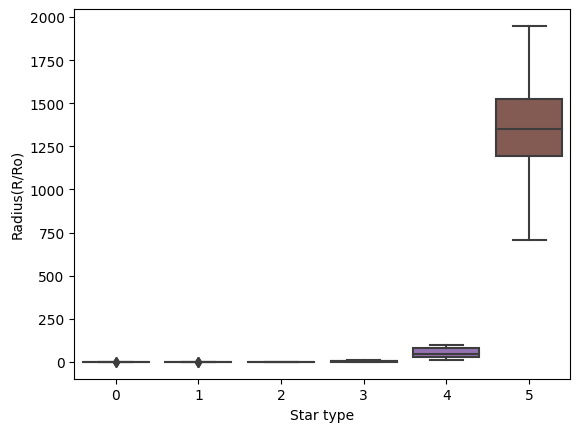

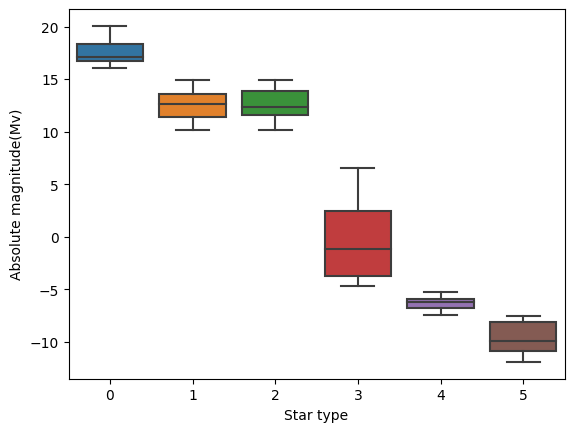

In [8]:
# show features boxplots
for i in range(len(df.columns[:4])):
    figure = plt.figure()
    ax = sns.boxplot(x='Star type', y=df.columns[i], data=df) 

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# split data: 80% for train, 20% for test
target = 'Star type'
X = df.drop([target, "Star color", "Spectral Class"], axis = 1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [10]:
# normalize data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [11]:
# classify with k-nearest neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)

def show_results():
    print(confusion_matrix(y_test, pred), "\n")
    print(classification_report(y_test, pred), "\n")
    print(accuracy_score(y_test, pred))

show_results()

[[ 8  0  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  9]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         9

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48
 

1.0


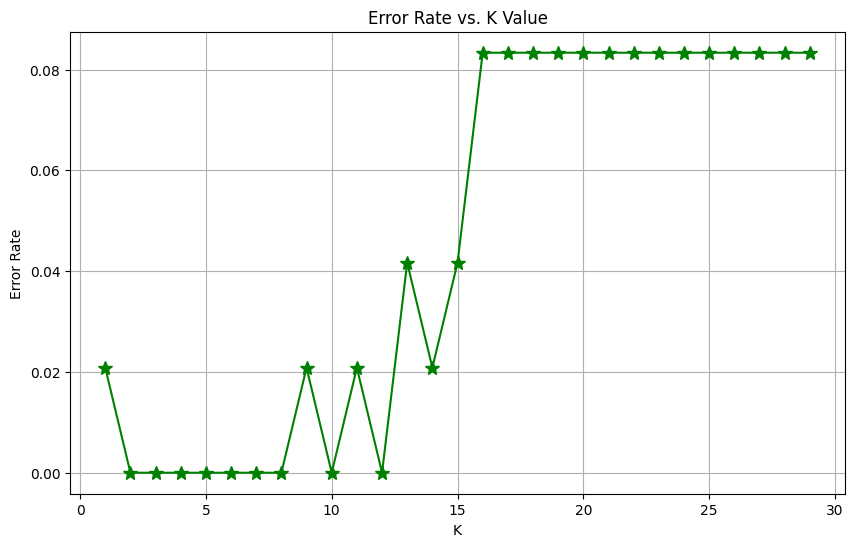

In [12]:
# despite good accurace try to find better K
import numpy as np

error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train, y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='*', markersize=10, color='g')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [13]:
# classify with k-nearest neighbors and K = 3

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)

show_results()

[[ 8  0  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  9]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         9

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48
 

1.0


In [14]:
# classify with decision tree

from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

show_results()

[[ 8  0  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  9]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         9

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48
 

1.0


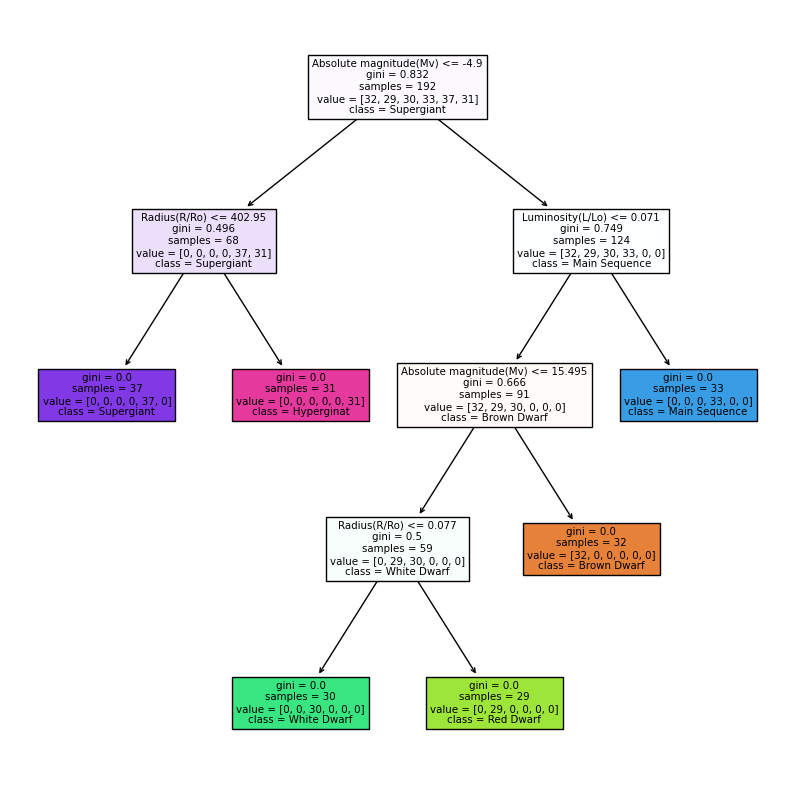

In [15]:
plt.figure(figsize = (10, 10))
plot_tree(dt, feature_names = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'], 
          class_names = classes, filled = True)
plt.show()

In [16]:
# classify with Support Vector Machine
from sklearn.svm import SVC

svm = SVC(C=1.0, gamma = 1.0, kernel = "rbf")
svm.fit(scaled_X_train, y_train)
pred = svm.predict(scaled_X_test)

show_results()

[[ 8  0  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  9]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         9

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48
 

1.0


In [17]:
# finding best C and gamma params with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_X_train, y_train)
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [18]:
pred = grid.predict(scaled_X_test)

show_results()

[[ 8  0  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  9]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         9

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48
 

1.0


In [19]:
# classify with random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=1, random_state=0)
rf.fit(scaled_X_train, y_train)
pred = rf.predict(scaled_X_test)

show_results()

[[ 8  0  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  9]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         9

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48
 

1.0


In [20]:
# classify with AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(learning_rate=4.0)
ab.fit(scaled_X_train, y_train)
pred = ab.predict(scaled_X_test)

print(ab.score(scaled_X_train, y_train))

0.6614583333333334


In [21]:
# finding best n_estimators and random_state params with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': range(40, 50), 'learning_rate': [5.0, 4.0, 3.0, 2.0, 1.0]}
#param_grid = {"n_estimators": range(90,110) }

grid = GridSearchCV(AdaBoostClassifier(), param_grid, refit=True)
grid.fit(scaled_X_train, y_train)
grid.predict(scaled_X_test)

print(grid.best_params_)
print(grid.score(scaled_X_train, y_train))

{'learning_rate': 1.0, 'n_estimators': 40}
0.8489583333333334
